# Proyecto práctico: árboles de decisión

**Utilizaremos** [Dataset Car Evaluation](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)


En este proyecto, exploraremos el conjunto de datos "Car Evaluation Data Set" y utilizaremos árboles de decisión para construir un modelo de clasificación capaz de predecir la calidad de compra de un automóvil.

## Conociendo nuestro dataset

El conjunto de datos "Car Evaluation Data Set" es un conjunto de datos público que consta de 1728 instancias etiquetadas con la clase de calidad de compra del automóvil. Cada instancia tiene 6 atributos discretos: precio, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad.


Los atributos son definidos de la siguiente manera:

- price (Precio): representa el costo del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- maint (Mantenimiento): representa el costo de mantenimiento del automóvil. Los valores posibles son 'vhigh' (muy caro), 'high' (caro), 'med' (medio) y 'low' (económico).

- doors (Número de puertas): representa la cantidad de puertas que tiene el automóvil. Los valores posibles son '2', '3', '4' y '5more' (5 o más).

- persons (Capacidad de personas): representa la capacidad de personas que puede transportar el automóvil. Los valores posibles son '2', '4', 'more' (más de 4).

- lug_boot (Tamaño del maletero): representa el tamaño del maletero del automóvil. Los valores posibles son 'small' (pequeño), 'med' (medio) y 'big' (grande).

- safety (Seguridad): representa la calidad de seguridad del automóvil. Los valores posibles son 'low' (baja), 'med' (media) y 'high' (alta).

- Class (Evaluación de la calidad de los automóviles):. Esta variable objetivo tiene cuatro posibles valores de clasificación: "unacc" (inaceptable), "acc" (aceptable), "good" (bueno) y "vgood" (muy bueno).

## Importar librerias

In [87]:
# Manejo y manipulacion de datos
# Para category-encoders
import category_encoders as ce

# Graficas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Balanceando los datos
from imblearn.under_sampling import RandomUnderSampler

# Graficar el en forma de tree
from sklearn import tree

# Modelo de arbol de decision
from sklearn.ensemble import RandomForestClassifier

# Metricas del modelo
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

# Seaparar nuestros datos en entrenamiento y prueba
# Optimizacion de hiperparametros
from sklearn.model_selection import GridSearchCV, train_test_split

# Estilo predefinido
sns.set(style="whitegrid", context='notebook', palette='pastel')

## Cargamos dataset

In [88]:
df = pd.read_csv("../data/car_evaluation.csv", header=None, sep=',')

# Analisis exploratorio de datos

Visualizacion del DatFrame

In [89]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Las columnas no tienen un nombre como tal

In [90]:
df.shape

(1728, 7)

El dataset contiene 1728 observaciones y 7 variables

Renombrar las columnas para entender mejor las columnas los datos

In [91]:
col_names = ['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

Verificamos la transformacion

In [92]:
df.head(10)

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


Tipos de datos

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Hay 7 variables en el conjunto de datos, donde todas están clasificadas como datos categóricos.


- •La variable **Class** es el objetivo del análisis.

Explorando la variable target

In [94]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Verificar si hay datos faltantes

In [95]:
df.isna().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Data pre-processing

Drop duplicates

In [96]:
df.drop_duplicates()

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Tampoco se encuentran datos duplicados

In [97]:
def resumen_c_p(df, target):
    """Funcion conteno y proporcion de datos

    Args:
        df (pd.DataFrame): Un dataframe de pandas
        target (Columna): La columna a analizar
    """
    count = df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)
    
    df_resumen = pd.DataFrame({"Freq[N]": count, 'Prop[%]': prop.round(4)})
    
    return df_resumen

Ver el conteo y la proporcion de Class

In [98]:
for i in col_names:
    print(" "*7, i.upper())
    print(resumen_c_p(df, i))
    print('*'*30)

        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
******************************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
******************************
        PERSONS
         Freq[N]  Prop[%]
persons                  
2            576   0.3333
4            576   0.3333
more         576   0.3333
******************************
        LUG_BOOT
          Freq[N]  Prop[%]
lug_boot                  
small         576   0.3333
med           576   0.3333
big           576   0.3333
******************************
        SAFETY
        Freq[N]  Prop[%]
safety                  
low     

Graficamos la variable Class separada por los distintos atributos

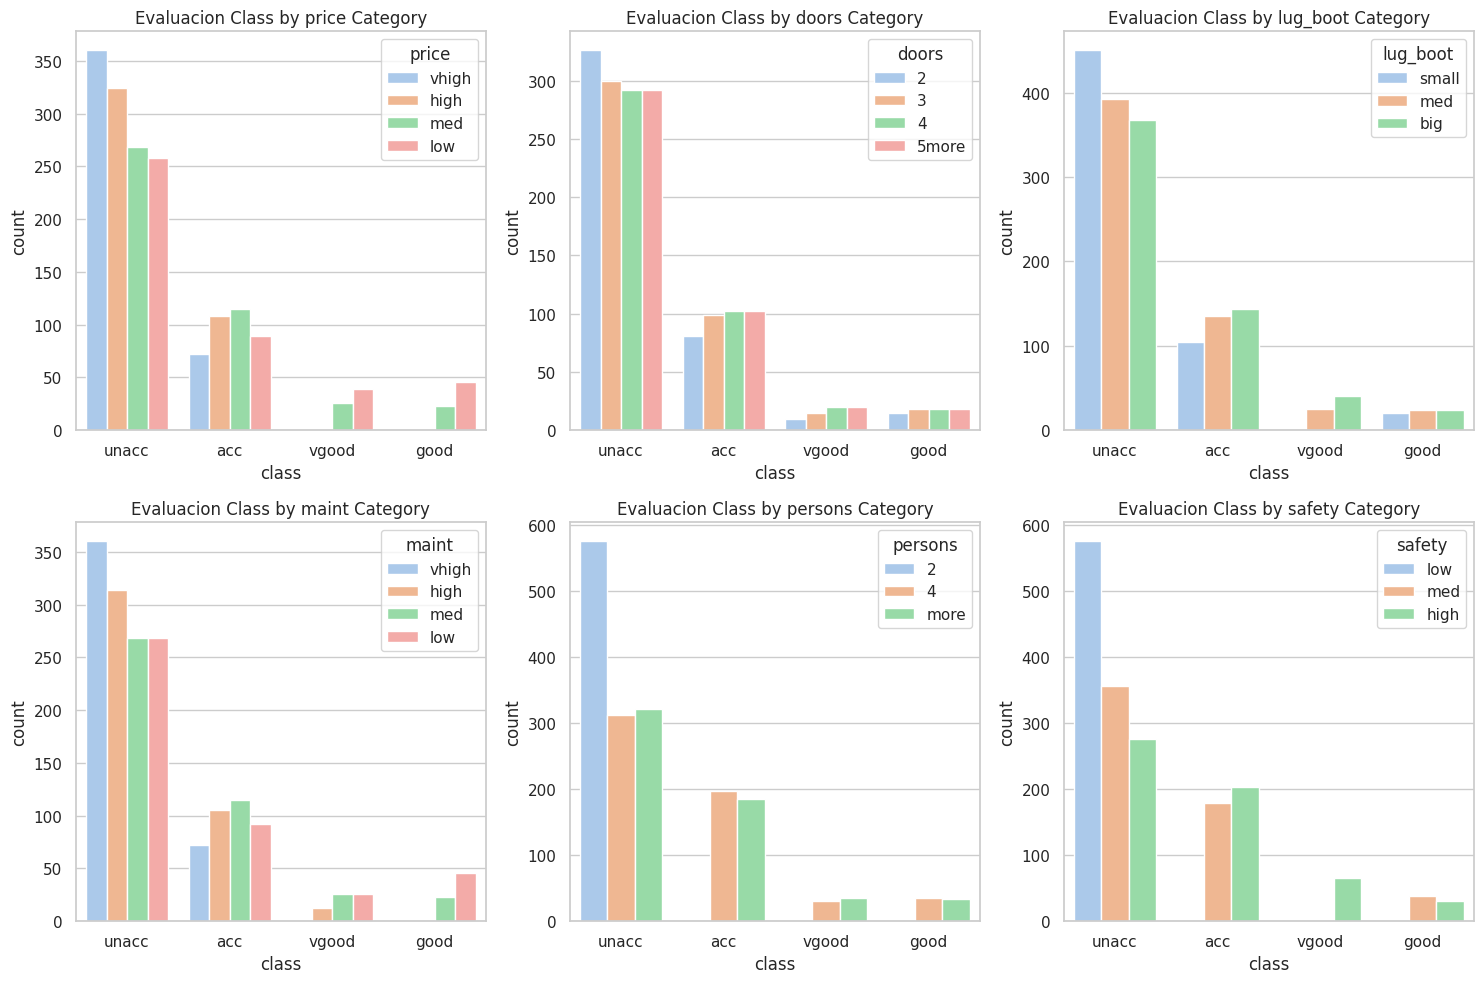

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, variable in enumerate(col_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df, x='class', hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluacion Class by {variable} Category")

plt.tight_layout()
plt.show()

## Insight


- Price: Los autos con precio bajo o medio tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de precio alto.

- Doors: Los autos con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos de 3 o 2 puertas.

- Lug_boot: Los autos con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con maletero pequeño.

- Maint: Los autos con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con costos de mantenimiento altos.
•Persons: Los autos con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con capacidad de menos de 4 personas.

- Safety: Los autos con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good en comparación con los autos con bajo o medio nivel de seguridad.


# Feature Engineering

## UnderSampling o Balanceo de Dataset

In [100]:
df['class'].value_counts(normalize=True) * 100

class
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64

Conteo

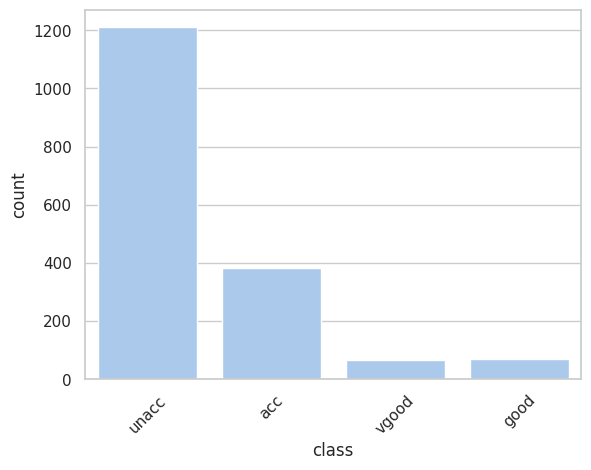

In [101]:
sns.countplot(data=df, x='class')
plt.xticks(rotation=45)
plt.show()

Proporcion

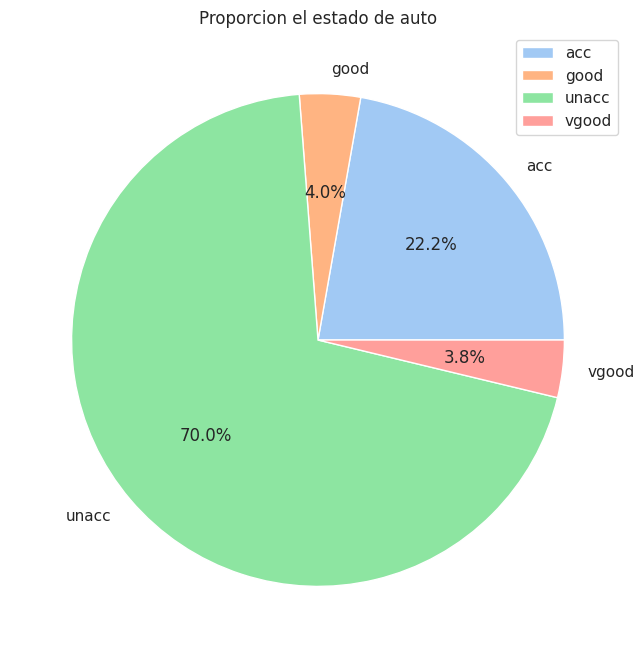

In [102]:
labels, counts = np.unique(df['class'], return_counts=True)

plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Proporcion el estado de auto")
plt.legend()
plt.show()

### Declarando variables predictoras y variable objetivo

In [103]:
X = df.drop(['class'], axis=1)
y = df['class']

Prueba con underSampling

In [104]:
under_sample = RandomUnderSampler(random_state=42)

In [105]:
X_under, y_under = under_sample.fit_resample(X, y)

30% para test y 70% para train

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #stratify=y

In [107]:
# X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

Para evitar el sesgo en la división de los datos es ideal pasar el argumento “stratify = y” en train_test_split, lo cual garantiza que la distribución de clases en la variable de destino “y”, se conserve tanto en el conjunto de entrenamiento como en el de prueba.

In [108]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [109]:
y_train.shape, y_test.shape

((1209,), (519,))

In [110]:
X_train.head(10)

,price,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med
888,med,vhigh,2,more,big,low
1001,med,high,3,2,small,high
327,vhigh,low,2,2,med,low
879,med,vhigh,2,4,big,low
1217,med,low,3,2,small,high


In [111]:
X_train.dtypes

price       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Entrenamiento del modelo de clasificacion con arbol de decision

Vemos que nuestros datos son objectos entonces vamos a hacer un encoding

In [112]:
encoder = ce.OrdinalEncoder(cols=col_names[:-1])

# Train
X_train = encoder.fit_transform(X_train)
# Test
X_test = encoder.transform(X_test)

Verficando la transformacion

In [113]:
X_train.head(10)

,price,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3
888,1,3,4,2,1,2
1001,1,2,2,3,2,1
327,4,4,4,3,3,2
879,1,3,4,1,1,2
1217,1,4,2,3,2,1


In [114]:
X_test.head(10)

,price,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2
931,1,3,3,1,3,3
23,4,3,4,2,3,1
844,2,4,1,3,1,3
964,1,3,1,2,2,3
764,2,4,4,3,1,1


In [115]:
y_train.head()

1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
Name: class, dtype: object

In [116]:
y_test.head()

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
Name: class, dtype: object

Instanciar el modelo

In [117]:
rfc_model = RandomForestClassifier(random_state=42)

In [118]:
param_grid = {
    "n_estimators": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,],
    # "max_depth": [],
    "criterion": ["gini", "entropy", "log_loss"],
    # "min_samples_split": [2],
    # "min_samples_leaf": [1]
}

In [119]:

grid_search = GridSearchCV(rfc_model, param_grid=param_grid, cv=5, return_train_score=True, scoring='accuracy')


# Entrenar
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='accuracy')

Los mejores resultados

In [120]:
for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print(f"Parametros: {params}")
    print(f"Mean Score: {mean_score}")
    print("="*70)

Parametros: {'criterion': 'gini', 'n_estimators': 1}
Mean Score: 0.8155755975446658
Parametros: {'criterion': 'gini', 'n_estimators': 2}
Mean Score: 0.8114262199513048
Parametros: {'criterion': 'gini', 'n_estimators': 3}
Mean Score: 0.8718013785535476
Parametros: {'criterion': 'gini', 'n_estimators': 4}
Mean Score: 0.8643496450739001
Parametros: {'criterion': 'gini', 'n_estimators': 5}
Mean Score: 0.8841912142930628
Parametros: {'criterion': 'gini', 'n_estimators': 6}
Mean Score: 0.889156750454374
Parametros: {'criterion': 'gini', 'n_estimators': 7}
Mean Score: 0.8883337334110628
Parametros: {'criterion': 'gini', 'n_estimators': 8}
Mean Score: 0.8908130722540379
Parametros: {'criterion': 'gini', 'n_estimators': 9}
Mean Score: 0.9007338568636193
Parametros: {'criterion': 'gini', 'n_estimators': 10}
Mean Score: 0.9040499297006276
Parametros: {'criterion': 'gini', 'n_estimators': 11}
Mean Score: 0.9007441445766606
Parametros: {'criterion': 'gini', 'n_estimators': 12}
Mean Score: 0.9098419

In [121]:
print(f"Mejores hiperParametros encontrados: {grid_search.best_params_}")
print("-"*60)
print(f"Mejor puntuacion de valudacion cruzada: {grid_search.best_score_}\n")

Mejores hiperParametros encontrados: {'criterion': 'entropy', 'n_estimators': 19}
------------------------------------------------------------
Mejor puntuacion de valudacion cruzada: 0.9172764994341758



In [122]:
best_rfc = grid_search.best_estimator_

print(best_rfc)

RandomForestClassifier(criterion='entropy', n_estimators=19, random_state=42)


Calculando las predicciones en Train y TEST

In [123]:
y_train_pred = best_rfc.predict(X_train)
y_test_pred = best_rfc.predict(X_test)

# Evaluacion del modelo

- **Accuracy es la excactitud**: Presicion de nuestro modelo.

- **Recall // Sensibilidad** Entender la tasa de verdaderos positivos.

- **Especificidad** // Nos hace entender la tasa de los verdaderos negativos.

- **F1** Resumen precisión y sensibilidad en una sola metrica.

In [124]:
# Train
train_accuracy = accuracy_score(y_train, y_train_pred)
# Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy: ", train_accuracy)
print("-"*60)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.9991728701406121
------------------------------------------------------------
Test accuracy:  0.9017341040462428


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

In [125]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         acc       0.79      0.81      0.79       118
        good       0.69      0.47      0.56        19
       unacc       0.95      0.98      0.97       358
       vgood       0.81      0.54      0.65        24

    accuracy                           0.90       519
   macro avg       0.81      0.70      0.74       519
weighted avg       0.90      0.90      0.90       519



Podemos observar que el f1-score de la clase 'good' es relativamente bajo, mientras que el f1-score de 'unacc' es alto. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'good'. Por otro lado, el f1-score de 'acc' y 'vgood' es promedio.

El f1-score promedio general es de 0.74, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.

## Graficamos la matriz de  confusion

- Permite visualizar el desempeño de un algoritmo de aprendizaje supervisado.

- Cada columna represeta el numero de predicciones de cada clase.

- Cada fila represeta a las instancias en la clase real.

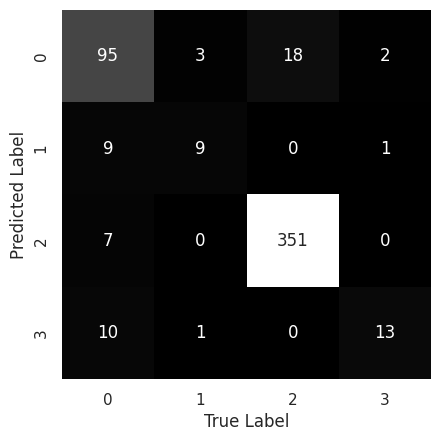

In [126]:
cm = confusion_matrix(y_test, y_test_pred, labels=best_rfc.classes_)

sns.heatmap(cm, annot=True, fmt="d", cmap='gray', square=True, cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [127]:
feature_scores_diabetes_df = pd.DataFrame({
    "Feature": list(X.columns),
    "importance": best_rfc.feature_importances_
}).sort_values("importance", ascending=False)

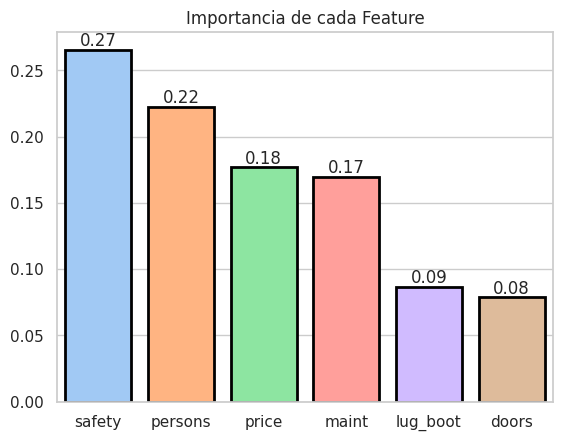

,Feature,importance
5,safety,0.265659
3,persons,0.222422
0,price,0.176739
1,maint,0.169884
4,lug_boot,0.086598
2,doors,0.078697


In [128]:
# Vamos a ordenar las importancias
importances = best_rfc.feature_importances_


# Todas las variables que no son el target
columns = X.columns

# Creacion de un DataFrame con las variables y sus importancias
# Ordenar el DataFrame por importancia en orden descendente

df_scores = pd.DataFrame(pd.Series(importances, index=columns).sort_values(ascending=False)).T


# anotaciones
for index, value in enumerate(df_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

# # Gracion del barplot
sns.barplot(data=df_scores, saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Importancia de cada Feature")
plt.show()
feature_scores_diabetes_df

- **safety**: Con una importancia de *0.2656*, se destaca como la característica más importante. Esto indica que la seguridad del vehículo tiene un impacto significativo en la evaluación.

- **price**: El precio del coche es la segunda característica más relevante, con una importancia de *0.2224*. Esto sugiere que el precio juega un papel crucial en la evaluación de los vehículos.

- **persons**: La capacidad de pasajeros es la cuarta característica más importante, con una importancia de *0.1767*. Esto sugiere que la cantidad de personas que el coche puede acomodar también es un factor relevante en la evaluación.

- **maint**: El costo de mantenimiento se posiciona como la cuarta característica más importante, con una importancia de *0.1708*. Esto indica que el costo de mantenimiento también contribuye significativamente a la evaluación de los coches.


- **lug_boot**: El tamaño del maletero tiene una importancia de *0.095706*. Esto indica que la capacidad de almacenamiento también contribuye a la evaluación de los vehículos.

- **doors**: El número de puertas se posiciona como la sexta característica más importante, con una importancia de 0.053310. Esto sugiere que la cantidad de puertas también puede afectar la evaluación de los coches.

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_rfc, X_train, y_train, cv=cv, scoring='accuracy')
print("")
print("Accuracy score for each fold: ", scores * 100)
print("Mean accuracy: ", scores.mean() * 100)
print("Stadard deviation: ", scores.std() * 100)


Accuracy score for each fold:  [93.38842975 92.97520661 91.73553719 86.36363636 90.87136929]
Mean accuracy:  91.06683584239225
Stadard deviation:  2.515437587171025
